# **Data Collection and Data Exploration**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

1. **Mount Dataset**

In [1]:
! chmod 600 /content/kaggle.json

In [2]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d mathchi/churn-for-bank-customers

  0% 0.00/261k [00:00<?, ?B/s]
100% 261k/261k [00:00<00:00, 77.6MB/s]


In [3]:
!mkdir /content/BankChurn

In [4]:
import zipfile
zip_file = zipfile.ZipFile('/content/churn-for-bank-customers.zip')
zip_file.extractall('/content/BankChurn')

2. **Load Data**

In [13]:
path = '/content/BankChurn/churn.csv'
df = pd.read_csv(path)
print('Data Shape :', df.shape)
df.head()

Data Shape : (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
print(df['Geography'].unique())      # Cari kategori data unik dari label
print(df['Geography'].nunique())     # Hitung kategori data unik dari label

['France' 'Spain' 'Germany']
3


In [19]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Data Cleaning**

In [22]:
df.duplicated().sum()

0

In [24]:
# Menghapus kolom yang tidak diinginkan
df_new = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df_new.isnull().sum()   # Tidak ada null value = Semua data terisi

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Exploratory Data Analysis**
- Data kategori: Discrete Frequency Distribution 
 - Countplot
- Data numerik: Continuous Frequency Distribution 
 - Histogram, Displot

In [27]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## **Categorical Data**

In [29]:
# Tentukan mana data kategorik dari dataset
cat = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


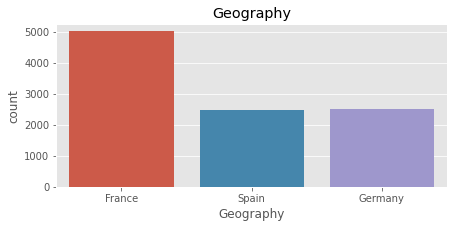

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


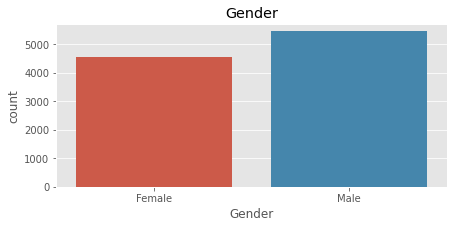

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


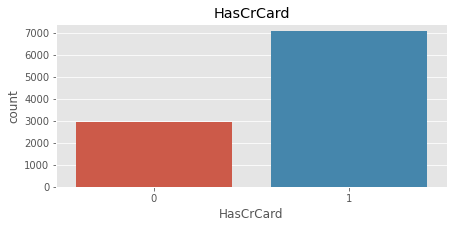

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


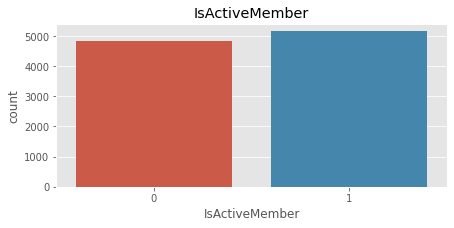

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


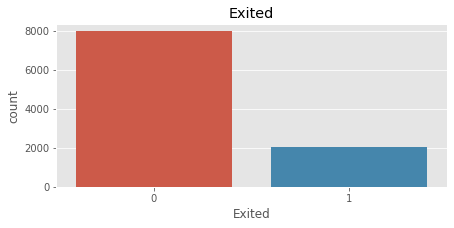

In [30]:
for column in cat:
  plt.figure(figsize=(7,3))
  plt.title(f"{column}")
  sns.countplot(df[column])
  plt.show()

- Hampir 50% customer berasal dari Perancis dan sisanya berasal dari Spanyol dan Jerman
- Customer pria sedikit lebih banyak dari customer wanita
- Sekitar 70% customer memiliki Credit Card
- Sekitar 50% customer tidak aktif (inactive)
- Sekitar 20% costomer meninggalkan bank

**Note:** Lihat dari sisi negatif/buruknya!


EAD ini bisa digunakan untuk mengambil keputusan, kedeppannya.

## **Numerical Data**
* Univarient
* Bivarient
* Multivarient
* Statistical Method

### **Univarient Analysis**

In [31]:
numeric_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

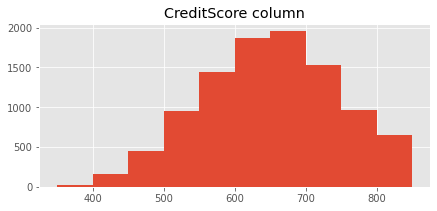

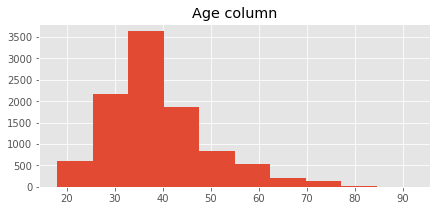

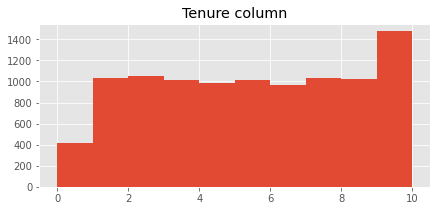

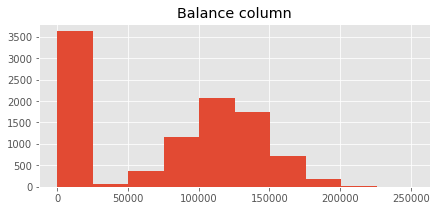

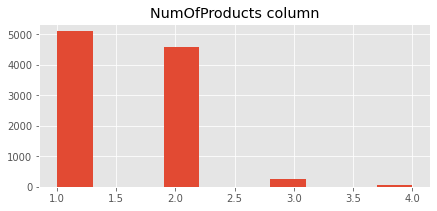

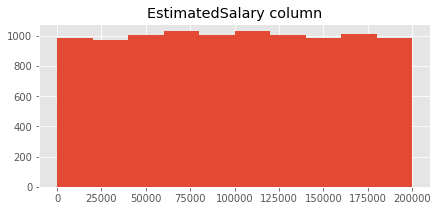

In [43]:
for column in numeric_col:
  plt.figure(figsize=(7,3))
  plt.title(f"{column} column")
  plt.hist(df[column])
  plt.show()

- Kebanyakan costomer memiliki credit score antara 500-800
- Kebanyakan costomer memiliki umur antara 25-50 tahun
- Tenur (Jabatan) memiliki distribusi seragam
- Terdapat 2 jenis customer: yang memiliki balance 0 dan yang memiliki balance antara 75k sd 175k
- Kebanyakan customer memiliki 1 atau 2 produk (50% customer memiliki 1 produk dan 45% customer memiliki 2 produk)
- Estimated Salary memiliki distribusi seragam

>**Note:** Ambil kesimpulan yang melibatkan >=50% dari data!\
Satu graph bisa memiliki >1 kesimpulan


EAD ini bisa digunakan untuk mengambil keputusan, kedeppannya.

### **Bivarient Analysis**

In [44]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


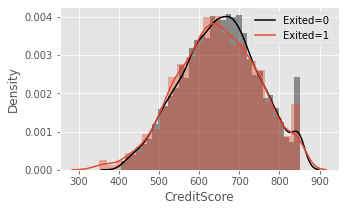

In [62]:
plt.figure(figsize=(5,3))
sns.distplot(df['CreditScore'][df['Exited']==0], color='black')
sns.distplot(df['CreditScore'][df['Exited']==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

**Kesimpulan:** Credit score bukan alasan customer pergi (exited)

Karena kedua distribusi (exited=0 dan exited=1) terhadap credit score hampir overlapping satu sama lain. Density customer yang pergi setara dengan customer yang bertahan.

**Note:** Kesimpulan atau statement yang diambil hanya bersifat perkiraan/estimasi berdasarkan domain knowledge

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


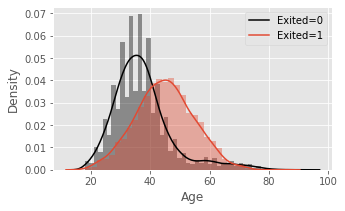

In [60]:
plt.figure(figsize=(5,3))
sns.distplot(df['Age'][df['Exited']==0], color='black')
sns.distplot(df['Age'][df['Exited']==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

**Kesimpulan:**

Untuk distribusi exited=0 lebiih tinggi pada grup dengan umur 20 sd 45, sedangkan distribusi exited=1 lebih tinggi pada grup umur 40 sd 60 tahun. Artinya kebanyakan customer muda menetap di bank dan kebanyakan costumer tua menginggalkan bank.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


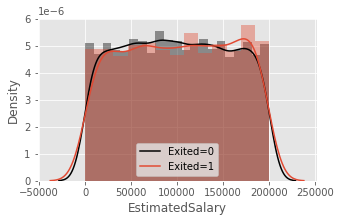

In [64]:
plt.figure(figsize=(5,3))
sns.distplot(df['EstimatedSalary'][df['Exited']==0],color='black')
sns.distplot(df['EstimatedSalary'][df['Exited']==1])
plt.legend(['Exited=0', 'Exited=1'])
plt.show()

**Kesimpulan:**

Tidak banyak memberikan insight/kesimpulan karena graph overlapping dan berdistribusi seragam.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


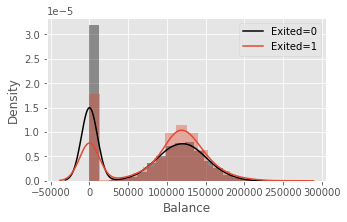

In [67]:
plt.figure(figsize=(5,3))
sns.distplot(df['Balance'][df['Exited']==0], color='black')
sns.distplot(df['Balance'][df['Exited']==1])
plt.legend(['Exited=0', 'Exited=1'])
plt.show()

**Kesimpulan:**

Tidak banyak memberikan insight/kesimpulan karena graph overlapping.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


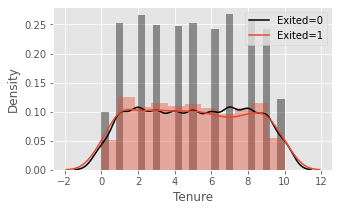

In [70]:
plt.figure(figsize=(5,3))
sns.distplot(df['Tenure'][df['Exited']==0], color='black')
sns.distplot(df['Tenure'][df['Exited']==1])
plt.legend(['Exited=0', 'Exited=1'])
plt.show()

**Kesimpulan:**

Tidak banyak memberikan insight/kesimpulan karena graph berdistribusi seragam.


Graph yang tidak bisa disimpulkan bukan berarti harus dihapus kolomnya. Mungkin saja kolom/variable yang digunakan di graph ini memiliki hubungan dengan kolom/variable di graph lain.

### **Multivarient Analysis**

In [73]:
#Data Kategorik vs Kategorik: Probability Density Distribution - Crosstab, Pivot Table
pivot = pd.crosstab(df['Geography'], df['Exited'], margins=True)
pivot

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [74]:
ratio = pivot[1]/pivot['All']
ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

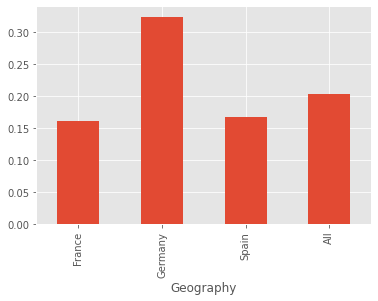

In [79]:
ratio.plot.bar()

**Kesimpulan:**
- Perancis: lebih sedikit customer yang meninggalkan bank
- Jerman: lebih banyak customer yang meninggalkan bank
- Spanyol: lebih sedikit customer yang meninggalkan bank

Lebih banyak customer yang meninggalkan bank di region Jerman dengan rasio lebih dari 30%

In [80]:
pivot = pd.crosstab(df['Gender'], df['Exited'], margins=True)
pivot

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


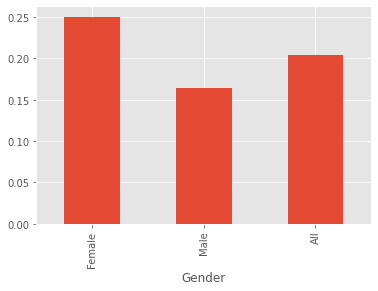

In [81]:
ratio = pivot[1]/pivot['All']
ratio.plot.bar()

**Kesimpulan:**

Customer wanita lebih banyak meninggalkan bank dibanding pria. Rasio wanita sekitar 25%

In [82]:
# Multivariate Analysis
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

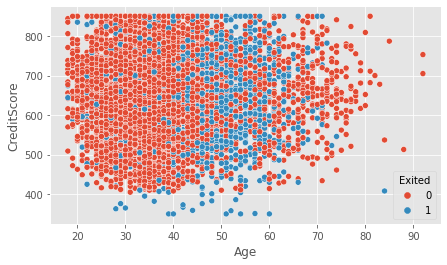

In [85]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=df_new)    # Data Numerik vs Numerik vs Kategorik
plt.show()

**Keseimpulan:**

- Customer dengan umur 40-70 cenderung meninggalkan bank
- Customer dengan credit score < 400 cenderung meninggalkan bank

Dipertengahan graph, karena creditscore dan exited berdistribusi seragam, tidak perlu dianalisis (analisis bagian ujung-ujungnya saja)

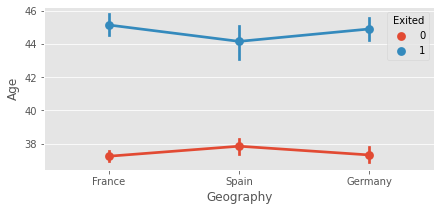

In [89]:
plt.figure(figsize=(7,3))
sns.pointplot(x='Geography', y='Age', hue='Exited', data=df)    # Data Kategorik vs Kategorik vs Numerik
plt.show()

**Keseimpulan:**

Bisa mendapatkan umur rata-rata customer yang bertahan dan meninggalkan bank dari 3 negara.
- Umur **rata-rata** customer yang meninggalkan bank di Perancis adalah 45 tahun.
- Umur **rata-rata** customer yang meninggalkan bank di Spanyol adalah 44 tahun.
- Umur **rata-rata** customer yang meninggalkan bank di Jerman adalah 45 tahun.

### **Statistical Method**

In [90]:
df_new.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


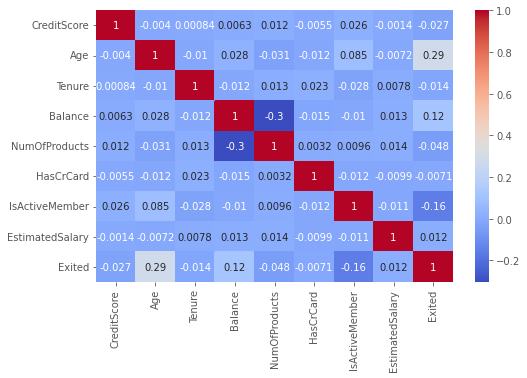

In [100]:
plt.figure(figsize=(8,5))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

**Keseimpulan:**

- Jika korelasi (x,y) diantara -0.1 sd +0.1 = korelasi yang buruk (bad correlation)
- Jika korelasi (x,y) diantara +0.1 sd +0.5 = korelasi yang bagus (good correlation)
- Jika korelasi (x,y) diantara -0.1 sd -0.5 = korelasi yang bagus (good correlation)
- Jika korelasi (x,y) > +0.5 = korelasi yang sangat bagus (very good correlation)
- Jika korelasi (x,y) < -0.5 = korelasi yang sangat bagus (very good correlation)

**Note:**
- Nilai diagonal selalu diabaikan
- Analisis tiap kolom pada heatmap lalu ambil kesimpulan berdasarkan domain knowledge


Contoh: Credit score berkorelasi negatif dengan umur karena customer umur 20 tahunan tidak ingin memiliki credit card.

# **ANOVA Analysis (Data Numerik)**

- Analisis varience ANOVA - F-test
- Digunakan untuk membandingkan mean dari >= 2 sample. Untuk memeriksa apakah mean mirip atau tidak
>Contoh : **Credit score**  = ANOVA dapat digunakan untuk membandingkan mean dari Credit Score customer yang meninggalkan bank dan yang bertahan.


- Ho : Mean kedua grup mirip
- Ha : Mean kedua grup berbeda satu sama lain

Untuk CI = 95%, Alpha = 1-95% =0.05


- Jika p-value < alpha = Tolak Ho, feature dianggap penting
- Jika p-value > alpha = Terima Ho, feature dianggap tidak penting

**Memeriksa p-value pada tiap kolom terhadap kolom label (Exited)**

Kita bisa menggunakan pada label numerik dan kategorik

In [104]:
from sklearn.feature_selection import f_classif

numeric_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
xd = df[numeric_col]
yd = df['Exited']

fvalue, pvalue = f_classif(xd, yd)
print('Ambil feature dengan p-value < 0.05\n')
for i in range(len(numeric_col)):
  print(f'{numeric_col[i]} :', pvalue[i])

Ambil feature dengan p-value < 0.05

CreditScore : 0.006738213892258643
Age : 1.2399313093415039e-186
Tenure : 0.1615268494952801
Balance : 1.275563319153163e-32
NumOfProducts : 1.7173330048040421e-06
EstimatedSalary : 0.22644042802376574


# **Chi Squre Test (Data Kategorik)**
Digunakan untuk membandingkan distribusi dari feature **kategorik** dalam >= 2 grup

- Ho: distribusi kategorik dalam >=2 grup mirip
- Ha: distribusi kategorik dalam >=2 grup tidak mirip

Untuk CI = 95%, Alpha = 1-95% =0.05

- Jika p-value < alpha = Tolak Ho, feature dianggap penting
- Jika p-value > alpha = Terima Ho, feature dianggap tidak penting

In [106]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

cat = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
xd = df[cat]
yd = df['Exited']

# Encode Gender dan Geography menjadi angka
xd['Geography'] = LabelEncoder().fit_transform(df['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(df['Gender'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [108]:
cvalue, pvalue = chi2(xd, yd)
print('Ambil feature dengan p-value < 0.05\n')
for i in range(len(cat)):
  print(f'{cat[i]} :', pvalue[i])

Ambil feature dengan p-value < 0.05

Geography : 0.0005756078382573235
Gender : 7.015574513879596e-13
HasCrCard : 0.6984962089530451
IsActiveMember : 1.568036240543455e-27
